# Librerias

In [375]:
# general
import numpy as np
import pandas as pd
import re
import os
import joblib
import pandas as pd
import random
import scipy.stats as stats
import pylab
import itertools

# funciones
from funciones.data_exploration import explore
from funciones.feature_cleaning import missing_data, outlier, rare_values
from funciones.feature_cleaning import missing_data as ms
from funciones.feature_cleaning import outlier as ot
from funciones.feature_cleaning import rare_values as ra
from funciones.feature_engineering import discretization as dc
from funciones.feature_engineering import discretization, encoding, transformation
from funciones.feature_selection import embedded_method, feature_shuffle, filter_method, hybrid


# visualización
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import warn
from pandas.plotting import scatter_matrix
plt.style.use('seaborn-colorblind')
#from data_exploration import explore


# preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder


# Aprendizaje No Supervisado
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis
from sklearn.cluster import KMeans, SpectralClustering, Birch, BisectingKMeans
from sklearn.manifold import TSNE, Isomap
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis


# ML sklearn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier, LGBMModel
from catboost import CatBoostClassifier


# metricas de evaluacion
from sklearn.metrics import make_scorer, confusion_matrix  # matriz de confusion 
from sklearn.metrics import classification_report # reporte de clasificación

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # clasificación binaria
from sklearn.metrics import average_precision_score

from sklearn.metrics import balanced_accuracy_score, auc, roc_curve, roc_auc_score, RocCurveDisplay # clasificación multi-class
from sklearn.metrics import cohen_kappa_score, hinge_loss, matthews_corrcoef, top_k_accuracy_score


from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay # clasificación multilabel
from sklearn.metrics import fbeta_score, zero_one_loss, hamming_loss, jaccard_score, log_loss
from sklearn.metrics import coverage_error, label_ranking_average_precision_score, label_ranking_loss 


# ML pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel


from sklearn import set_config

import shap


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


# Bases de datos

In [376]:
data1 = pd.read_csv('data/cardio_base.csv')
data2 = pd.read_csv('data/cardio_alco.csv')
data3 = pd.read_csv('data/covid_data.csv')


In [377]:
data1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [378]:
data2

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0
...,...
56898,99949;0
56899,99950;0
56900,99951;0
56901,99952;0


In [379]:
data3

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [380]:
data1['años'] = data1['age']/360
data1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,años
0,0,18393,2,168,62.0,110,80,1,0,51.091667
1,1,20228,1,156,85.0,140,90,3,0,56.188889
2,2,18857,1,165,64.0,130,70,3,0,52.380556
3,3,17623,2,169,82.0,150,100,1,0,48.952778
4,4,17474,1,156,56.0,100,60,1,0,48.538889
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,53.444444
69996,99995,22601,1,158,126.0,140,90,2,0,62.780556
69997,99996,19066,2,183,105.0,180,90,3,0,52.961111
69998,99998,22431,1,163,72.0,135,80,1,0,62.308333


In [381]:
over_50_cholesterol = data1[data1['años'] > 50]['cholesterol'].mean()
rest_cholesterol = data1[data1['años'] <= 50]['cholesterol'].mean()
difference = over_50_cholesterol - rest_cholesterol
difference

0.1848374813212097

In [382]:
data1['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [383]:
# Calculate number of smokers by gender
smokers_by_gender = data1.groupby('gender')['smoke'].sum()
smokers_by_gender

gender
1     813
2    5356
Name: smoke, dtype: int64

In [384]:
# Calculate total population by gender
total_by_gender = data1.groupby('gender').size()
total_by_gender

gender
1    45530
2    24470
dtype: int64

In [385]:
# Calculate ratio of smokers by gender
ratio_smokers = smokers_by_gender / total_by_gender
ratio_smokers

gender
1    0.017856
2    0.218880
dtype: float64

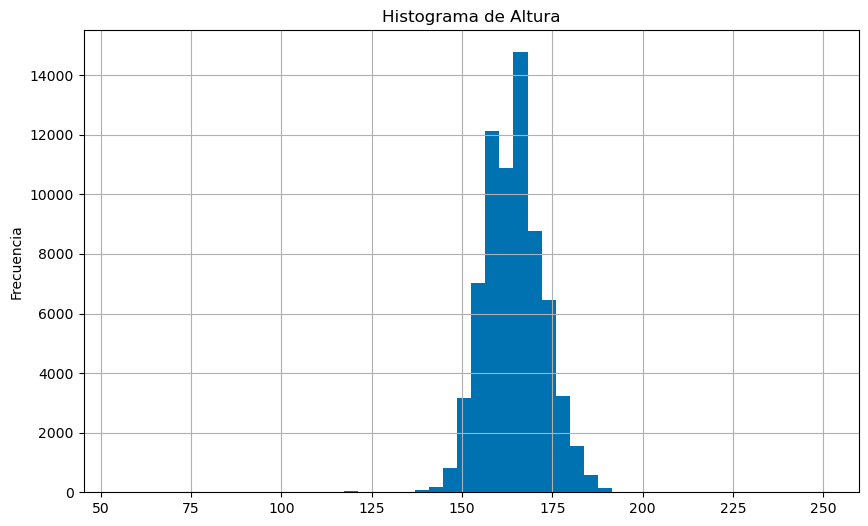

In [386]:
# Histogram
plt.figure(figsize=(10, 6))
data1['height'].hist(bins=50)
plt.title(f'Histograma de Altura') 
#plt.xlabel(var)
plt.ylabel('Frecuencia')
plt.show()

In [387]:
# Assuming your data is loaded in a dataframe named 'data'
height_quantile_99 = data1['height'].quantile(0.99)
height_quantile_99

184.0

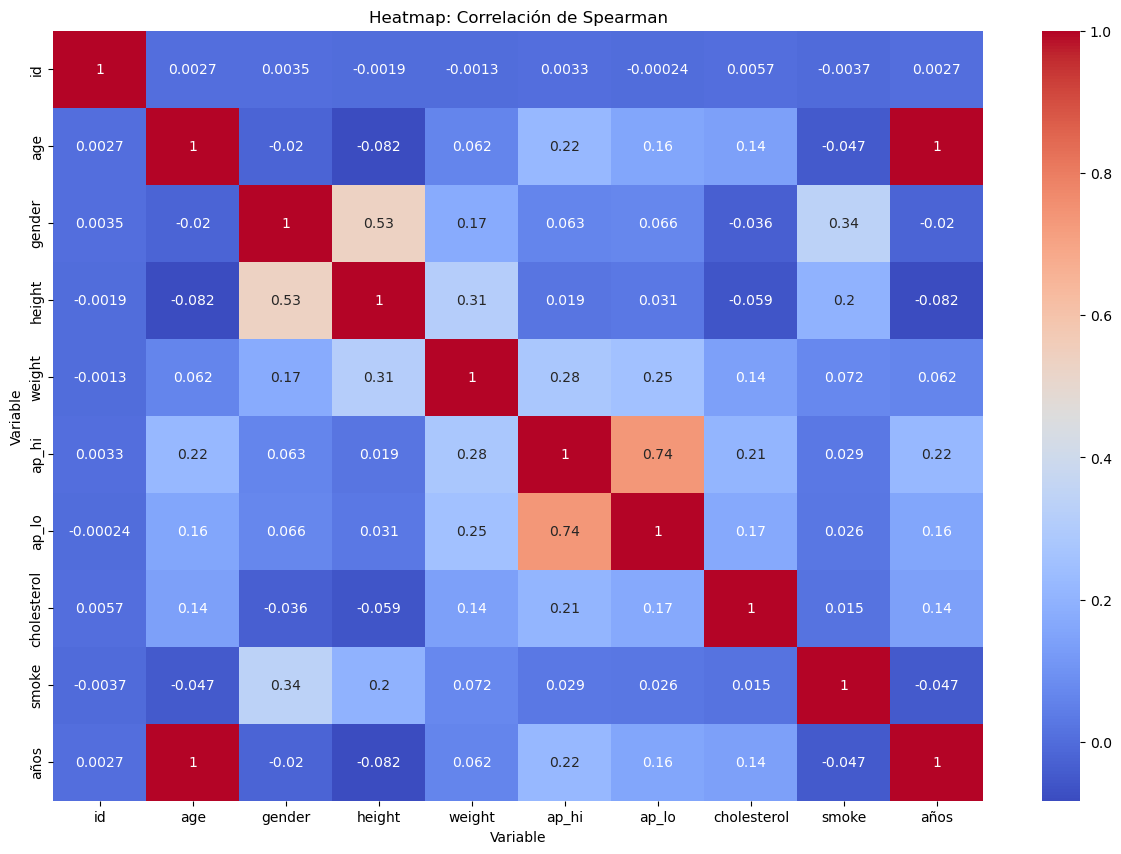

In [388]:
# Plot the covariance matrix heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data1.corr(method='spearman'), annot=True, cmap='coolwarm', ax=ax)

# Set the axis labels
plt.xlabel('Variable')
plt.ylabel('Variable')

# Set the plot title
plt.title('Heatmap: Correlación de Spearman')

# Show the plot
plt.show()

In [389]:
# Calculate mean and standard deviation
mean_height = data1['height'].mean()
std_dev = data1['height'].std()

# Filter observations outside 2 standard deviations of the mean
outside_2_std = data1[(data1['height'] < mean_height - 2 * std_dev) | (data1['height'] > mean_height + 2 * std_dev)]

# Calculate total count and percentage
total_count = data1.shape[0]  # Assuming 'shape' gives total rows
percentage_outside = round((len(outside_2_std) / total_count) * 100, 2)

percentage_outside


3.34

In [390]:
# Create new columns for pre-split and post-split strings
data2[['id', 'alco']] = data2['id;alco'].str.split(';', 1, expand=True)
data2['id'] = data2['id'].astype(int)
#ata2['alco'] = data2['id'].astype(int)

# Handle edge cases where a string might be missing after the split
#df['after_split'] = df['after_split'].fillna(df['before_split])

data2

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.


,id;alco,id,alco
0,44;0,44,0
1,45;0,45,0
2,46;0,46,0
3,47;0,47,0
4,49;0,49,0
...,...,...,...
56898,99949;0,99949,0
56899,99950;0,99950,0
56900,99951;0,99951,0
56901,99952;0,99952,0


In [391]:
data2_aux = data2[data2['alco']==1]
data2_aux

,id;alco,id,alco


In [392]:
# unir (merge) bases de datos por columna Id
data_alcohol = pd.merge(data1, data2, on='id')
data_alcohol
pop_over50 = data_alcohol[data_alcohol['años']>50]
pop_over50

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,años,id;alco,alco
1,45,20652,1,160,73.0,130,85,1,0,57.366667,45;0,0
2,46,21940,2,173,82.0,140,90,3,0,60.944444,46;0,0
3,47,20404,1,163,55.0,120,80,1,0,56.677778,47;0,0
4,49,18328,2,175,95.0,120,80,1,0,50.911111,49;0,0
6,52,23388,2,162,72.0,130,80,1,1,64.966667,52;0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56896,99947,20587,2,169,79.0,140,90,1,0,57.186111,99947;0,0
56898,99949,21151,1,178,69.0,130,90,1,0,58.752778,99949;0,0
56899,99950,19538,2,155,76.0,130,90,1,0,54.272222,99950;0,0
56900,99951,22491,2,170,72.0,120,80,1,0,62.475000,99951;0,0


In [393]:
data1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,años
0,0,18393,2,168,62.0,110,80,1,0,51.091667
1,1,20228,1,156,85.0,140,90,3,0,56.188889
2,2,18857,1,165,64.0,130,70,3,0,52.380556
3,3,17623,2,169,82.0,150,100,1,0,48.952778
4,4,17474,1,156,56.0,100,60,1,0,48.538889
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,53.444444
69996,99995,22601,1,158,126.0,140,90,2,0,62.780556
69997,99996,19066,2,183,105.0,180,90,3,0,52.961111
69998,99998,22431,1,163,72.0,135,80,1,0,62.308333


In [394]:
# Group data by smoking status
smokers = data1[data1['smoke'] == 1]
non_smokers = data1[data1['smoke'] == 0]

# Calculate mean weight for each group
smoker_weight_mean = smokers['weight'].mean()
non_smoker_weight_mean = non_smokers['weight'].mean()

# Perform two-tailed t-test with equal variances
t_statistic, p_value = stats.ttest_ind(smokers['weight'], non_smokers['weight'], equal_var=True)
p_value


4.517830901143157e-72

In [395]:
data1['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [396]:
# Group data by gender
men = data1[data1['gender'] == '1']
women = data1[data1['gender'] == '2']

# Calculate mean blood pressure for each group
men_bp_mean = men['ap_hi'].mean()
women_bp_mean = women['ap_hi'].mean()

# Perform two-tailed t-test with equal variances
t_statistic, p_value = stats.ttest_ind(men['ap_hi'], women['ap_hi'], equal_var=True)

p_value


nan

In [397]:
# Group data by smoking status
smokers = data1[data1['smoke'] == True]
non_smokers = data1[data1['smoke'] == False]

# Calculate mean cholesterol level for each group
smoker_cholesterol_mean = smokers['cholesterol'].mean()
non_smoker_cholesterol_mean = non_smokers['cholesterol'].mean()

# Perform two-tailed t-test with equal variances
t_statistic, p_value = stats.ttest_ind(smokers['cholesterol'], non_smokers['cholesterol'], equal_var=True)

p_value


0.006152424413599285

In [398]:
data3

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [399]:
# Filter data for Italy and Germany
italy = data3[data3['location'] == 'Italy']
germany = data3[data3['location'] == 'Germany']

italy['new_cases_accum'] = italy['new_cases'].cumsum()
italy = italy[(italy['date'] <= '2020-03-20')  & (italy['date'] >= '2020-02-28')]
#italy['days_accum'] = np.linspace(1,22)
len(italy)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


22

In [400]:
italy

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,new_cases_accum
10747,Italy,2020-02-28,250,5,60461828.0,23.021,35220.084,3.18,650
10748,Italy,2020-02-29,238,4,60461828.0,23.021,35220.084,3.18,888
10749,Italy,2020-03-01,240,8,60461828.0,23.021,35220.084,3.18,1128
10750,Italy,2020-03-02,561,6,60461828.0,23.021,35220.084,3.18,1689
10751,Italy,2020-03-03,347,17,60461828.0,23.021,35220.084,3.18,2036
10752,Italy,2020-03-04,466,28,60461828.0,23.021,35220.084,3.18,2502
10753,Italy,2020-03-05,587,27,60461828.0,23.021,35220.084,3.18,3089
10754,Italy,2020-03-06,769,41,60461828.0,23.021,35220.084,3.18,3858
10755,Italy,2020-03-07,778,49,60461828.0,23.021,35220.084,3.18,4636
10756,Italy,2020-03-08,1247,36,60461828.0,23.021,35220.084,3.18,5883


In [402]:
# Add the death rate column (deaths per million inhabitants)
data3['death_rate'] = (data3['new_deaths'] / data3['population']) * 1000000

# Group data by country and calculate descriptive statistics
grouped_data = data3.groupby('location')['death_rate'].describe()

# Sort by highest death rate
sorted_countries = grouped_data['mean'].sort_values(ascending=False)
sorted_countries



location
San Marino                          7.639203
Andorra                             7.416472
Belgium                             5.091823
Sint Maarten (Dutch part)           4.542820
United Kingdom                      3.694664
                                      ...   
Saint Kitts and Nevis               0.000000
Saint Lucia                         0.000000
Lesotho                             0.000000
Saint Vincent and the Grenadines    0.000000
International                            NaN
Name: mean, Length: 212, dtype: float64

In [403]:
# Filter data with population over 20% aged 65+ and death rate over 50
filtered_df = data3[data3['aged_65_older_percent'] > 20]
filtered_df = filtered_df[filtered_df['death_rate'] > 50]

# Handle NA values (if any)
filtered_df.dropna(subset=['aged_65_older_percent', 'death_rate'], inplace=True)

# Define positive class based on your criteria
positive_class = 1  # Adjust this value if "positive" has a different meaning

# Extract true labels
true_labels = filtered_df['death_rate'] > 50  # Assuming death rate above 50 is "positive"

# Predict all rows as "positive" (adjust if needed)
predicted_labels = [positive_class] * len(filtered_df)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
f1

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.


0.0

In [409]:
L = [1,2,3,4,5]

x = list(map(lambda x:x**2,L))
x

[1, 4, 9, 16, 25]

In [410]:
import random

from random import  choice

In [415]:
numbers = [num for num in range(0,100)]

#shuf = shuffle(numbers)

pick = choice(numbers)
pick

68

# Coding Challenge

In [417]:
def puntos(ops) -> int:
    
    lista = []
    
    
    for item in ops:
        
        if :
        
        
        else:
            item = item.astype(int)

        
    
    
    
    return None





In [ ]:
ops=['5',02]
puntos